In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## pivot tables by hands

In [17]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [16]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [4]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [18]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index = ['sex', age], columns = 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [21]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [10]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True) # compute totals 

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [11]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


In [22]:
f = open('births.txt', 'r')
x = f.readlines()
f.close()

In [24]:
df = pd.DataFrame(x)
df_new = pd.DataFrame(columns = ['year', 'month', 'day', 'sex', 'births', 'na'])
df_new
df

,0
0,"year,month,day,gender,births\n"
1,"1969,1,1,F,4046\n"
2,"1969,1,1,M,4440\n"
3,"1969,1,2,F,4454\n"
4,"1969,1,2,M,4548\n"
...,...
15543,"2008,10,null,M,183219\n"
15544,"2008,11,null,F,158939\n"
15545,"2008,11,null,M,165468\n"
15546,"2008,12,null,F,173215\n"


In [25]:
import re
for i in df.index[1:-1]:
     df_new.loc[i, ] = re.split(',|\n', df.loc[i, 0])

In [26]:
last = df.loc[df.shape[0]-1, 0].split(',')
last.append(' ')
last

['2008', '12', 'null', 'M', '181235', ' ']

In [28]:
df_new.loc[df.shape[0]-1, :] = last
df_new

,year,month,day,sex,births,na
1,1969,1,1,F,4046,
2,1969,1,1,M,4440,
3,1969,1,2,F,4454,
4,1969,1,2,M,4548,
5,1969,1,3,F,4548,
...,...,...,...,...,...,...
15543,2008,10,null,M,183219,
15544,2008,11,null,F,158939,
15545,2008,11,null,M,165468,
15546,2008,12,null,F,173215,


In [29]:
df_new = df_new.drop(columns = 'na')

In [30]:
df_new = df_new.replace('null', np.NaN)
df_new.isnull().any()

year      False
month     False
day        True
sex       False
births    False
dtype: bool

In [34]:
df_new = df_new.astype({'year': 'int64', 'month': 'int64',  'day': 'float', 'births': 'int64'})

In [35]:
births  = df_new
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'sex', aggfunc='sum')

sex,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


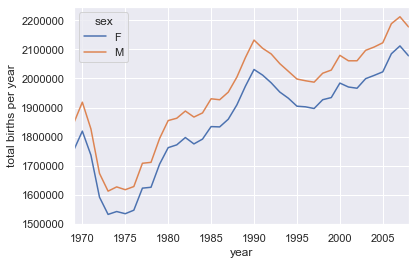

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='sex', aggfunc='sum').plot()
plt.ylabel('total births per year');


In [36]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [39]:
quartiles

array([4358. , 4814. , 5289.5])

In [41]:
births = births.query('(births > @mu -5*@sig) & (births < @mu+5*@sig)')

In [210]:
births.shape

(14610, 6)

In [45]:
births['day'] = births['day'].astype(int)
births

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,sex,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980
1988-12-30,1988,12,30,F,5742,1980
1988-12-30,1988,12,30,M,6095,1980
1988-12-31,1988,12,31,F,4435,1980


In [46]:
10000 * births.year + 100 * births.month + births.day

1969-01-01    19690101
1969-01-01    19690101
1969-01-02    19690102
1969-01-02    19690102
1969-01-03    19690103
                ...   
1988-12-29    19881229
1988-12-30    19881230
1988-12-30    19881230
1988-12-31    19881231
1988-12-31    19881231
Length: 14610, dtype: int64

In [47]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

In [48]:
births['dayofweek'] = births.index.dayofweek

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
births.head()

,year,month,day,sex,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


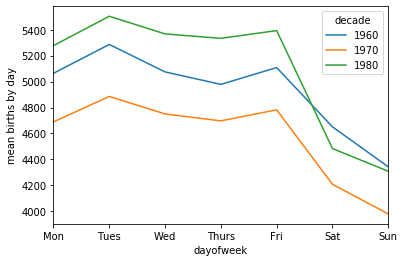

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');


In [52]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [225]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


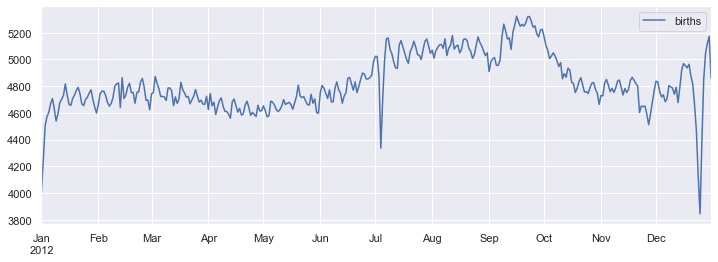

In [231]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax =ax);


In [20]:
?pd.qcut

Signature: pd.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
Docstring:
Quantile-based discretization function. Discretize variable into
equal-sized buckets based on rank or based on sample quantiles. For example
1000 values for 10 quantiles would produce a Categorical object indicating
quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : integer or array of quantiles
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles
labels : array or boolean, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    The precision at which to store and display the bins labels
duplicates : {def

In [32]:
5%2

1